**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Dataset](#toc2_)    
  - [Source](#toc2_1_)    
  - [Description](#toc2_2_)    
  - [Data Dictionary](#toc2_3_)    
  - [Variable notes](#toc2_4_)    
- [Import libs](#toc3_)    
- [Read data](#toc4_)    
- [EDA (Exploratory Data Analysis)](#toc5_)    
  - [Base feature statistics](#toc5_1_)    
    - [Numerical features](#toc5_1_1_)    
    - [Object features](#toc5_1_2_)    
  - [Classify features](#toc5_2_)    
    - [Categorical types](#toc5_2_1_)    
      - [Nominal Features](#toc5_2_1_1_)    
      - [Ordinal Feature](#toc5_2_1_2_)    
    - [Numerical Features](#toc5_2_2_)    
      - [Continuous Features](#toc5_2_2_1_)    
      - [Discrete Features](#toc5_2_2_2_)    
    - [Features data type](#toc5_2_3_)    
  - [Check null values](#toc5_3_)    
  - [Variable visualization](#toc5_4_)    
    - [Target variable - Survived](#toc5_4_1_)    
        - [Pclass - Survive](#toc5_4_1_1_1_)    
      - [Sex - Survive](#toc5_4_1_2_)    
      - [AgeGroped - Survive](#toc5_4_1_3_)    
      - [Sibsp - Survive](#toc5_4_1_4_)    
      - [Age - Survived](#toc5_4_1_5_)    
        - [Age -- Pclass -- Sex](#toc5_4_1_5_1_)    
        - [Age - Parch](#toc5_4_1_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

This notebook is an introduction to the topic of machine learning issue. It present a classification approach using data from the **Titanic** dataset.

The goal in this task will be classify people into the correct group (Survive/Not Survive) based on the features.

**Steps:**

1. At the beginning of this file the data (features) will be described to understand what each fearture means.
2. The next step will be perform **EDA** (**E**xploratory **D**ata **A**nalysis), where it will try to understand data through visualizations. Check the null values, outlier, correlations
3. Third step will prepare data to create a model. It include Imputate empty data, transform categorical data, featre scaling and split data into train set and test set.
4. Next step will be  to build a simple model to obrain  a starting value (for comparsion purposes)
5. Create new features and comparing the quality of models
6. Optimalize model using diferent hyperparameters (using GridSearchCv or RandomizedSearchCV)
7. Conlusions - Summary results and discussing about the most important features
8. Suggestion - How to develop this model in next steps ?
9. Save model to the file (.pkl)
  


# <a id='toc2_'></a>[Dataset](#toc0_)

## <a id='toc2_1_'></a>[Source](#toc0_)

The data comes from [**Kaggle - titanic dataset**]([www.kaggle.com](https://www.kaggle.com/competitions/titanic/)) 

## <a id='toc2_2_'></a>[Description](#toc0_)

The dataset is split to 2 files:
- training set (titanic_train.csv)
- test test (titanic_test.csv)

**The training set** - should be used to build machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## <a id='toc2_3_'></a>[Data Dictionary](#toc0_)

| Variable | Definition | Key |
| :---: | :---: | :---: |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / childrean aboard The Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| name | Person names | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

## <a id='toc2_4_'></a>[Variable notes](#toc0_)

**pclass** - A proxy for socio-economic status (SES)

1st = UPPER

2nd = MIDDLE

3rd = LOWER

**age** - Age is fractional if less than 1 . If the age is estimated, is it in the form of xx.**5**



**sibsp** - family relations define as:

Siblings = brother, sisters, stepbrother, stepsister <br/>
Spouse = husband, wife (mistresses and fiances were ignored)



**parch** - family relations define as:

Parent = monther, father <br/>
Child = daughter, son, stepdaughter, stepson

# <a id='toc3_'></a>[Import libs](#toc0_)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# <a id='toc4_'></a>[Read data](#toc0_)

In [4]:
df = pd.read_csv('datasets/tytanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <a id='toc5_'></a>[EDA (Exploratory Data Analysis)](#toc0_)

- Base statistic of each feature
- Classify feature to group
- Check null values
- Visualize features
- Distribution analysis
- Correlation analysis
 

## <a id='toc5_1_'></a>[Base feature statistics](#toc0_)

We can check basic stats by using df.describe, but we should divide it on numerical feature and object features

### <a id='toc5_1_1_'></a>[Numerical features](#toc0_)

In [5]:
print('Basic statistics for the numerical features:')
df.describe(include='number')

Basic statistics for the numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Description of above statistics**:

**PassengerId** - Count 891 - not null values in range 1-891

**Survived** <span style="color:red;">Target feature!</span>- 891, so not null values, it's binary values 0/1. <br/>
&emsp; mean is ~0.38, so 38% people alive

**Pclass** - no null values, 75% or more were in second class

**Age** - Null values exists, mean age is 29-30 yo with quite a large deviation (~14.5). Range is from 0.42 to 80. <br/>
&emsp; .75 percentile is 38, so we can assume that outlier exist in this feature

**Sibsp** - No null values, on avg, the person travel with  1 Sib/Spouse. .75 percentile is 1, so outlier can exists.
The range is 0 to 8

**Parch** - No null values, on avg, the person do not travel with Parent or Child. .75 percentile is 0, so outlier can exists.
The range is 0-6

**Fare** - No Null values, on avg person fare 32, with huge deviation. There is a huge probablity on outlier because averege value deviate from median (avg 32 to 14 median). We can see 75% data of fare is to 31 value. The range is 0 to 512, so exists person that do not fare for ticket.






### <a id='toc5_1_2_'></a>[Object features](#toc0_)

In [6]:
print("Basic statistics for object type features:")
df.describe(exclude='number')

Basic statistics for object type features:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


**Description of above statistics:**

**Name** - No null value, we have all unique names (count == unique number)

**Sex** - No null values, we have two diffrent values. The values is Male - 577, Famale - 314

**Ticket** - No null values, ticket are not unique? why? group tickets? - The most freq of duplicate ticket is 7

**Cabin** - Huge amount of null values - propably not usefull feature (to drop?), sometimes cabin are duplicate (shared cabin?)

**Embarked** - two cases of null values. 3 different values, where S is the top (644 times)

## <a id='toc5_2_'></a>[Classify features](#toc0_)

To check types of each featue we will use `df.info()` - this function print information about feature type and number of non-null values and dataset like number entries (range)
  

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### <a id='toc5_2_1_'></a>[Categorical types](#toc0_)

This type we can divide to:

- Nominal Feature - Categories without any specific order (ex. colors)
- Ordinal Feature - Categories with a logical ordel (ex. education level)



#### <a id='toc5_2_1_1_'></a>[Nominal Features](#toc0_)

- Name
- Sex
- Ticket
- Cabin
- Embarked

#### <a id='toc5_2_1_2_'></a>[Ordinal Feature](#toc0_)

- Pclass
  


### <a id='toc5_2_2_'></a>[Numerical Features](#toc0_)

Numerical feature could be divide into group:

- Continuous Features - Can take any value with a range
- Discrete Features - Take specific integer values


#### <a id='toc5_2_2_1_'></a>[Continuous Features](#toc0_)

- Fare
- Age

#### <a id='toc5_2_2_2_'></a>[Discrete Features](#toc0_)

- SibSp
- Parch


### <a id='toc5_2_3_'></a>[Features data type](#toc0_)

In dataset we can distinguished types:

- float: Age; Fare (2)
- integer: PassengerId, Survived, Pclass, Sibsp, Parch (5)
- object: Name, Sex, Ticket, Cabin, Embarked (5)

## <a id='toc5_3_'></a>[Check null values](#toc0_)

We can search a data set for NULL values in many ways:

- from `df.info`
- by df.isnull().sum()
    - using above with heatmap
- df.isnull().mean() gives percentage value, which shows us the scale
- using `missingno` library that provide toolset to search missing data visualizations and get quick summary of the completenes of dataset. [READMORE HERE!](https://github.com/ResidentMario/missingno)


worth to read article: [dealing with missing values](https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501)



In [8]:
print("Summary of missing values in each variable")
missingno = df.isnull().sum().to_frame(name='count')
missingno['%'] = (missingno['count']/df.shape[0]*100.0).round(2)
missingno

Summary of missing values in each variable


,count,%
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


Presentation of missing data for indexes in the form of heatmap


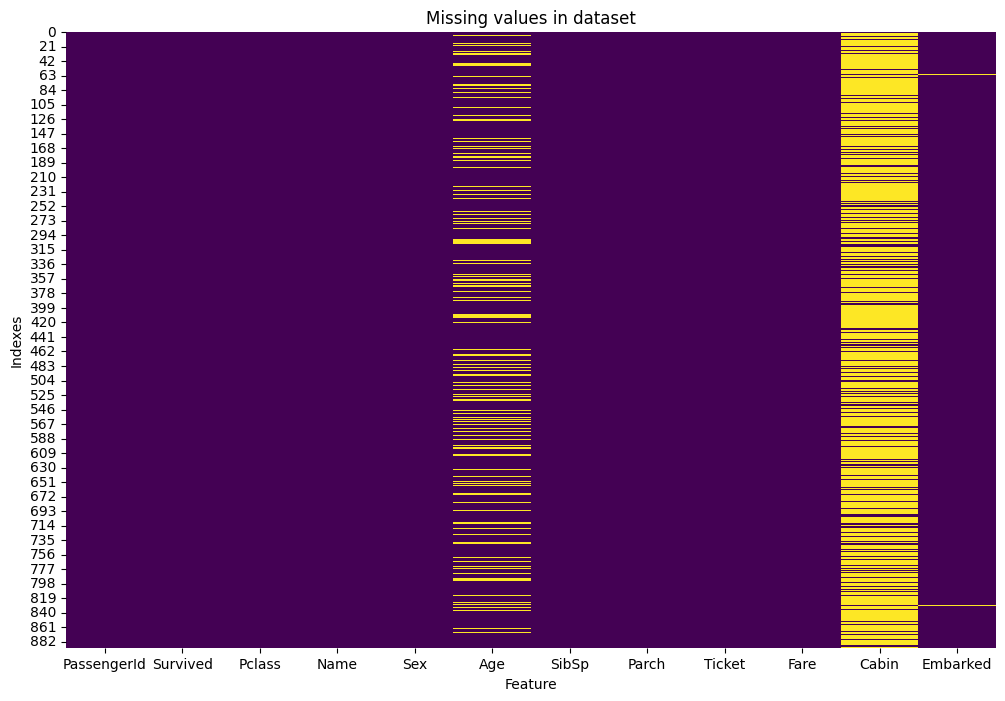

In [9]:
print("Presentation of missing data for indexes in the form of heatmap")
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')
plt.xlabel('Feature')
plt.ylabel('Indexes')
plt.title('Missing values in dataset')
plt.show()

**Conclusion**

The most missing values is in `Cabin` - 687 missing values which is 77,1% total data!. drop is to consider, no way to impute/calculate data.

`Age` - ~20% data is missing (187 values), we can impute missing values by median or mean.

`Embarked` - 2 missing values, we can impute the most frequency value.




Fill missing value in `Embarked` by the most common value.


In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Arek\AppData\Local\Temp\ipykernel_9304\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


## <a id='toc5_4_'></a>[Variable visualization](#toc0_)

Let's start from visualize **target** variable, the next step will be numerical variables and finally we will see categorical variables look like

### <a id='toc5_4_1_'></a>[Target variable - Survived](#toc0_)

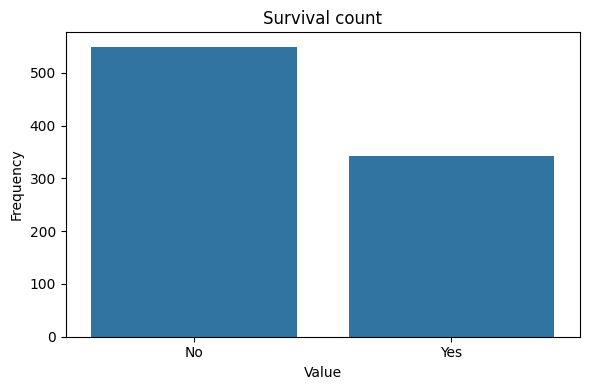

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(df, x='Survived')
ax = plt.gca()
ax.set_xticks(ticks=df.Survived.unique(), labels=['No', 'Yes'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Survival count')
plt.tight_layout()
plt.show()

##### <a id='toc5_4_1_1_1_'></a>[Pclass - Survive](#toc0_)

We can see, that the moest people did not survive the disaster.

Now we should check relationship beetwen survived and other feature

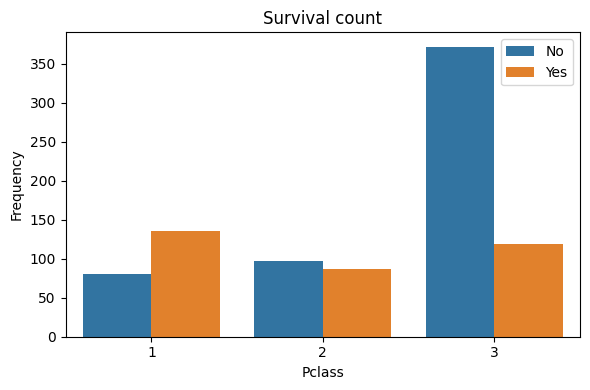

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(df, x='Pclass', hue='Survived')
ax = plt.gca()
ax.legend(labels=['No','Yes'])
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Survival count')
plt.legend
plt.tight_layout()
plt.show()

df[['Pclass', 'Survived']].value_counts().sort_index()

**Conlusion**

**1st class** - More people survived then not survived (136/80)

**2nd class** - number of passenger whos survived is similar to the number passengers who did not survive (87/97)

**3rd class** - much more passengers did not survive than survived. (119/372)

,so we can see that the chance of survival was highest for class 1 passengers and lowest for class 3 passengers.

**Calculations**

Let's calculate the chances of survival for people in different classes and compare them with each other.

We can calculate the chance using formula:

$$
O(Survive class ) = \frac{P(survive)}{1-P(survive)} 
$$

where P(survive in class) is:

$$
P(survive) = \frac{\text{number of passenger who surive}}{\text{total number of passenger in class}} 
$$






In [13]:
survival_counts = df.groupby('Pclass')['Survived'].value_counts().unstack()
print("Number of passengers, who surive or not in each class")
print(survival_counts)
print(50*"-", "\n")

# Calculate survive probablity for each class
survival_counts['Total'] = survival_counts[0] + survival_counts[1]
survival_counts['Probability'] = survival_counts[1]/survival_counts['Total']
print("With Probablity:")
print(survival_counts)
print(50*"-", "\n")

# Calculate survival odds for each class
survival_counts['Survival Odds'] = survival_counts['Probability']/(1 - survival_counts['Probability'])
print("With Odds:") 
print(survival_counts)
print(50*"-", '\n')
## Calculating the odds ratio for each class
odds_ratio_1_to_3 = survival_counts.at[1, 'Survival Odds'] / survival_counts.at[3, 'Survival Odds']
odds_ratio_1_to_2 = survival_counts.at[1, 'Survival Odds'] / survival_counts.at[2, 'Survival Odds']
odds_ratio_2_to_3 = survival_counts.at[2, 'Survival Odds'] / survival_counts.at[3, 'Survival Odds']

print(f"Odds ratio (class 1 to class 3): {odds_ratio_1_to_3:.2f}")
print(f"Odds ratio (class 1 to class 2): {odds_ratio_1_to_2:.2f}")
print(f"Odds ratio (class 2 to class 3): {odds_ratio_2_to_3:.2f}")



Number of passengers, who surive or not in each class
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
-------------------------------------------------- 

With Probablity:
Survived    0    1  Total  Probability
Pclass                                
1          80  136    216     0.629630
2          97   87    184     0.472826
3         372  119    491     0.242363
-------------------------------------------------- 

With Odds:
Survived    0    1  Total  Probability  Survival Odds
Pclass                                               
1          80  136    216     0.629630       1.700000
2          97   87    184     0.472826       0.896907
3         372  119    491     0.242363       0.319892
-------------------------------------------------- 

Odds ratio (class 1 to class 3): 5.31
Odds ratio (class 1 to class 2): 1.90
Odds ratio (class 2 to class 3): 2.80


**Summary**

traveler in the first class had `5.3` times more chance to survive than traveler in 3 class! and `2.8` times than traveler in class two!

So, feature `Pclass` is important for surviving!


#### <a id='toc5_4_1_2_'></a>[Sex - Survive](#toc0_)

**Lets see how Survive looks like according to Sex**

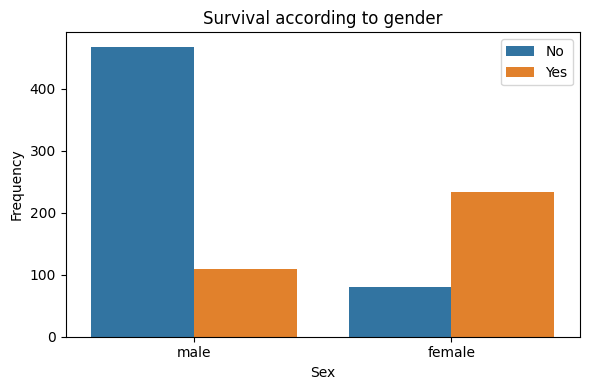

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(df, x='Sex', hue='Survived')
ax = plt.gca()
ax.legend(labels=['No','Yes'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Survival according to gender')
plt.legend
plt.tight_layout()
plt.show()

df[['Sex', 'Survived']].value_counts().sort_index()

**Conslusion**

at first glance we see that, female have more odds to survive than male!. So we can say `Sex` is very important to classify target variable

#### <a id='toc5_4_1_3_'></a>[AgeGroped - Survive](#toc0_)

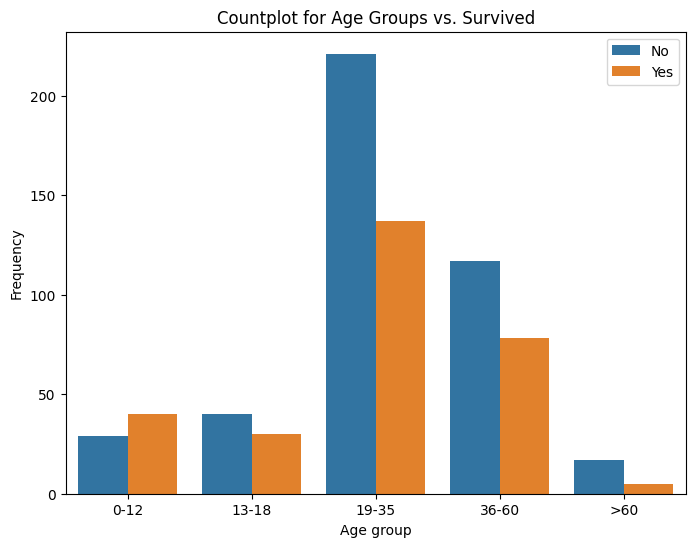

In [15]:
#df['Age'] = df['Age'].fillna(df.Age.median(), axis=0)

bins = [0, 12, 18,35,60, np.inf]
labels = ['0-12', '13-18', '19-35', '36-60', '>60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title('Countplot for Age Groups vs. Survived')
plt.xlabel('Age group')
plt.ylabel('Frequency')
axes = plt.gca()
axes.legend(labels=['No', 'Yes'])
plt.show()

**Conlusion**:

child (0-12) had the most odds to survive the disaster, and group `>60` had the lowest chance.

#### <a id='toc5_4_1_4_'></a>[Sibsp - Survive](#toc0_)

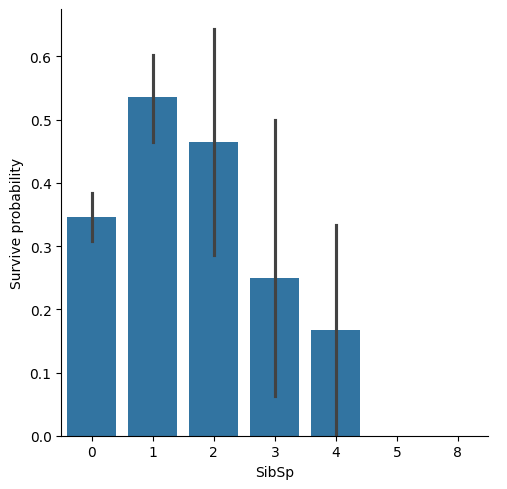

In [16]:
cp = sns.catplot(data=df, x='SibSp', y='Survived', kind='bar')
cp.set_ylabels('Survive probability')
plt.show()

* If traveler have more than 2 SibSp, then have less chance to survive
* Maybe we can consider new feature using this information.

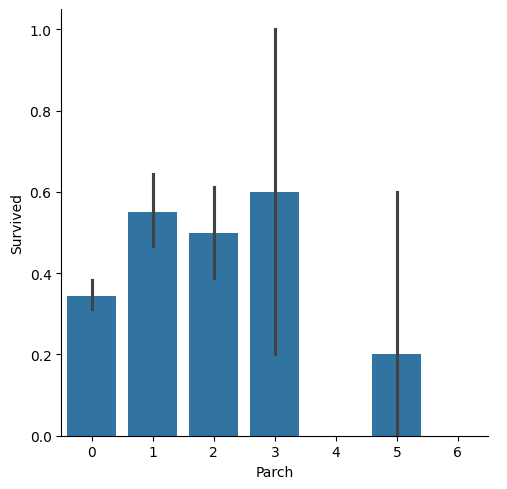

In [17]:
#### Parch - Survived

ct = sns.catplot(data=df, x = 'Parch', y='Survived', kind='bar')

* Sum of (Sibsp + Parch + 1) can create new feature with threshold = 3 
* small famillies (1,2,3) have more chance to survive
* We can see big dispersion (std) in Parch = 3

#### <a id='toc5_4_1_5_'></a>[Age - Survived](#toc0_)

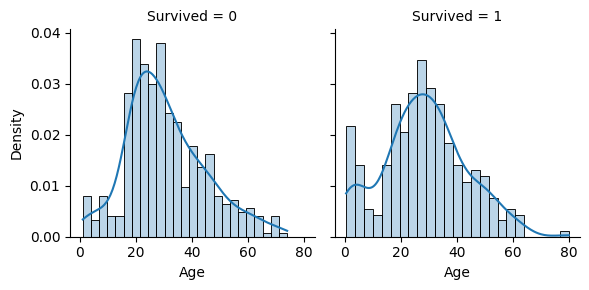

In [18]:
fg = sns.FacetGrid(df, col='Survived')
fg.map(sns.histplot, 'Age', bins=25, kde=True, stat='density',alpha=0.3)
plt.show()

* a lot tweenties do not alive disaster
* children to 10 yo have big Density to survive
* The most traveller had in group 15-35 and age do not carries information about surviving,
* The oldest person survive

If age is important to classify target, we have to fill in the missing value correctly!

We need to undestand the correlations of age with other features to ensure  correct value completion

##### <a id='toc5_4_1_5_1_'></a>[Age -- Pclass -- Sex](#toc0_)

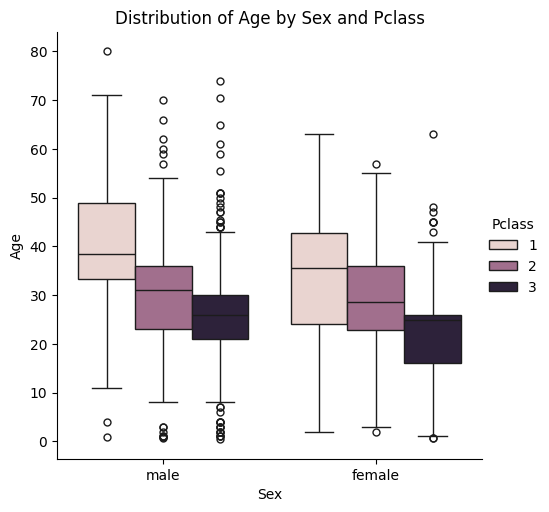

In [40]:
sns.catplot(data=df, x='Sex', y='Age', hue='Pclass', kind='box')
plt.title("Distribution of Age by Sex and Pclass")
plt.show()

In the first class passengers are older then in 2nd and 2nd are older then 3rd

so, `Pclass` is important to impute Age correctly!

##### <a id='toc5_4_1_5_2_'></a>[Age - Parch/SibSp](#toc0_)

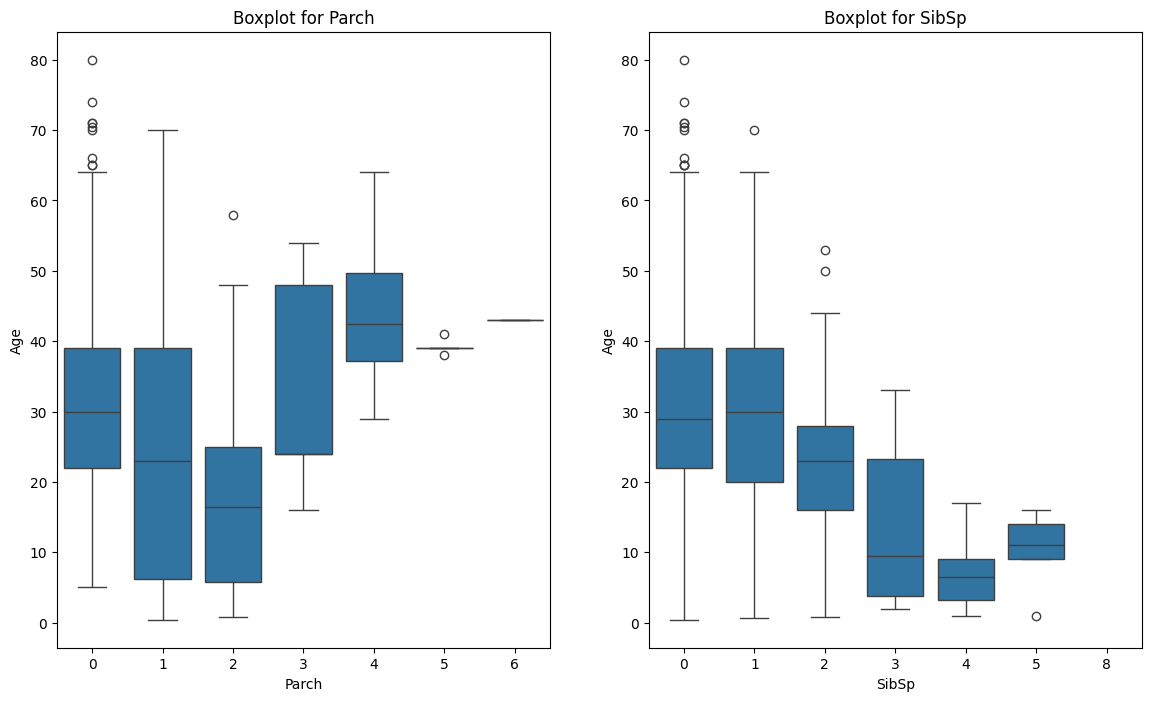

In [20]:
columns = ['Parch', 'SibSp']
fig, axes = plt.subplots(1, 2, figsize=(14,8))
for i, ax in enumerate(axes.flatten()):
    ax.set_title(f'Boxplot for {columns[i]}')
    sns.boxplot(data=df, x=columns[i], y='Age', ax=axes[i])
    
plt.show()

* The oldest people are person who have >2 Parch and 0-1 SibSp, on the other hand the younger ale people with Parch = 2 and SibSp in (3,4,5)

##### FillNa values for Age Feautre

In [37]:
#indexes_of_nan_age = list(df['Age'][df['Age'].isnull()].index) ## return a list of indexes of null values.

#Let's loop through the indexes. 
# If the index is part of a group (Pclass, SibSp, Parch), 
# then calculate the median for this group; otherwise, calculate the median for the whole dataset.


# for index in indexes_of_nan_age:
#     age_grouped_median = df['Age'][(
#         (df['SibSp'] == df.iloc[i]['SibSp']) &
#         (df['Pclass'] == df.iloc[i]['Pclass']) &
#         (df['Parch'] == df.iloc[i]['Parch'])
#     )].median()
#     age_median = df['Age'].median()
#     if not np.isnan(age_grouped_median):
#         df['Age'].iloc[i] = age_grouped_median
#     else:
#         df['Age'].iloc[i] = age_median


############################# Above fuction is replaced by vector-based fuction #################

#def fill_missing_age(df):
group_median = df.groupby(['Pclass', 'SibSp', 'Parch'])['Age'].transform('median')

## fill missing values using median for specifc group
df['Age'] = df['Age'].fillna(group_median)

## If missing values exist then fill by median calculate from whole set

df['Age'] = df['Age'].fillna(df['Age'].median())

---

**Let's visualize some other feature**

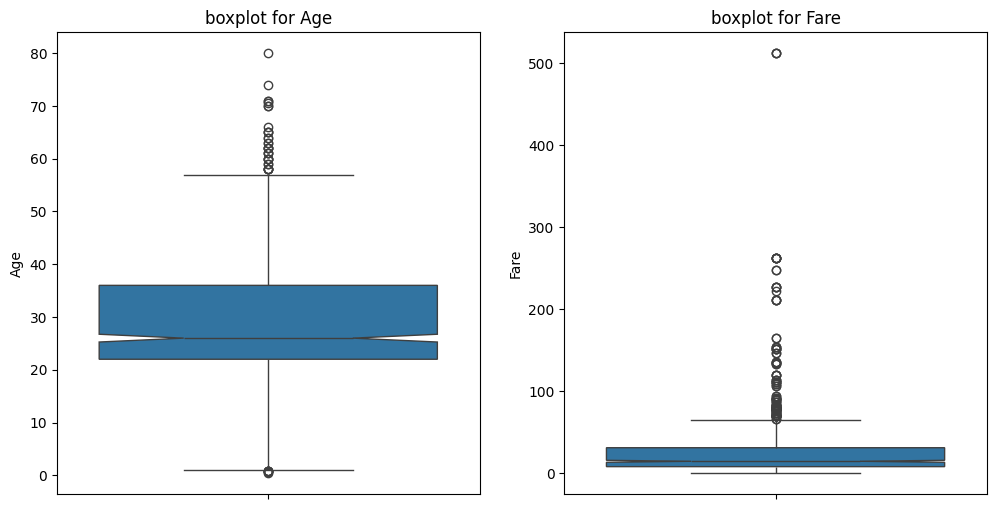

In [38]:
numeric_feature = ['Age', 'Fare']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes = axes.flatten()
for i, ax in enumerate(axes.flatten()):
    ax.set_title(f'boxplot for {numeric_feature[i]}')
    sns.boxplot(data=df, y=numeric_feature[i], 
                ax=axes[i],
                notch=True, orient='v')

**variable numerical distribution**



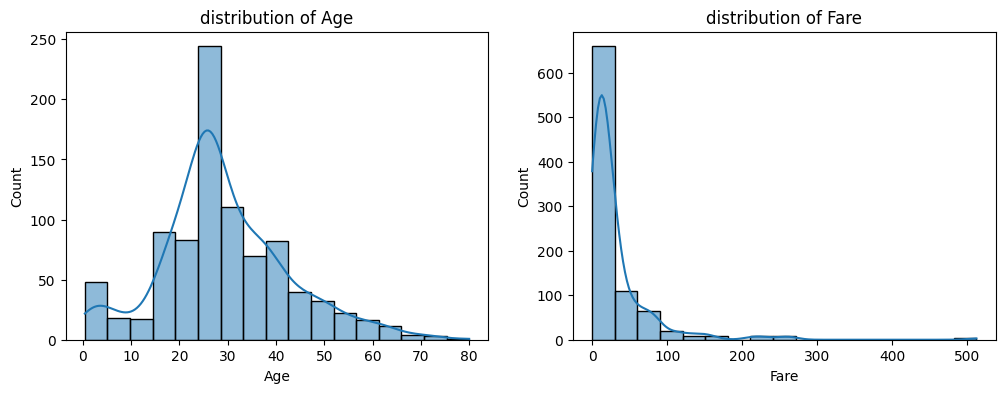

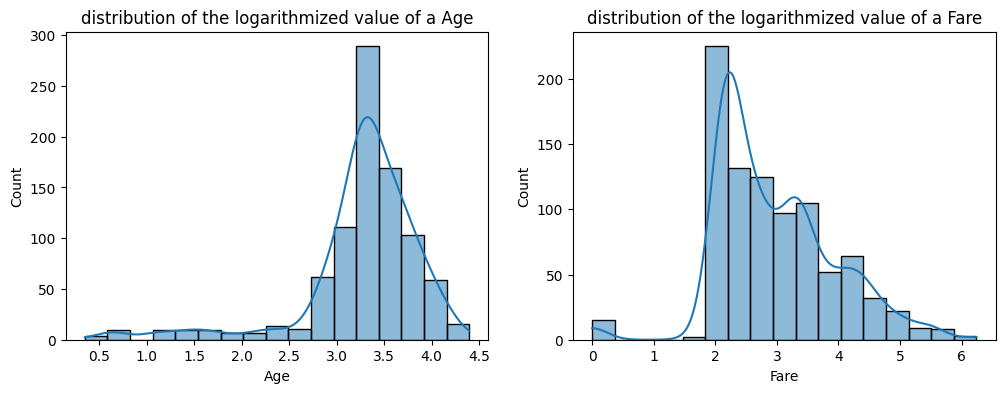

In [41]:
from scipy.stats import skew

numeric_feature = ['Age', 'Fare']

######### Obliczanie liczby koszyków ############
n = len(df['Fare'].dropna())
# Reguła Freedmana-Diaconisa
q75, q25 = np.percentile(df['Fare'].dropna(), [75 ,25])
iqr = q75 - q25
fd_bins = int(np.ceil((2 * iqr) / (n ** (1 / 3))))

# Reguła Doane'a
g1 = skew(df['Fare'].dropna())
sigma_g1 = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
doane_bins = int(np.ceil(1 + np.log2(n) + np.log2(1 + abs(g1) / sigma_g1)))


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes = axes.flatten()
for i, ax in enumerate(axes.flatten()):
    ax.set_title(f'distribution of {numeric_feature[i]}')
    sns.histplot(data=df, x=numeric_feature[i], 
                ax=axes[i], 
                kde=True,
                bins=doane_bins
            )

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes = axes.flatten()
for i, ax in enumerate(axes.flatten()):
    ax.set_title(f'distribution of the logarithmized value of a {numeric_feature[i]}')
    sns.histplot(data=np.log1p(df[numeric_feature[i]]), 
                ax=axes[i], 
                kde=True,
                bins=doane_bins
            )
    

In [42]:
# Zidentyfikowanie wartości odstających (np. powyżej 99 percentyla)
outliers = df[df['Fare'] > df['Fare'].quantile(0.995)]


# Wyświetlenie wartości odstających
outliers


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,19-35
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,36-60
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,19-35


In [25]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinalColumn = ['AgeGroup']
# categories = [labels]
# oce = OrdinalEncoder(categories=categories)

# df2 = df.copy()
# df2[ordinalColumn] = oce.fit_transform(df2[ordinalColumn], )